<font color="dark blue">Real World Uses Cases Project: Big Data Tools for Business

---
# Donald Trump Communication Analysis on Twitter
---
<font color="grey">*Léa DIAMBUANA, Assa FISSIROU, Mehdi BALOUKA*

#Part 1 : Setting spark environment on google colabs

In [ ]:
# for installing pyspark
!pip install pyspark==3.0.0

# mount your google drive to be able to access files from your google drive !
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 16.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044160 sha256=f71852cf7f6e1546a5a539d627417a3281f1af6d6c7529e3e9b572808e0fbc58
  Stored in directory: /root/.cache/pip/wheels/b1/bb/8b/ca24d3f756f2ed967225b0871898869db676eb5846df5adc56
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
Mounted at /content/drive


In [ ]:
import pyspark

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("YourApp") \
    .getOrCreate()

# Get the SparkContext
sc = spark.sparkContext

###<font color="green">1. Setting the packages for the analyses

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import re
from datetime import datetime
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud

###<font color="green">2. Importing Datasets about Donald Trump's tweets on Google Colabs

In [ ]:
# Creating RDDs
trump_tweets = sc.textFile('drive/MyDrive/AIBA Big data Analytics/PYSPARK-COURSE/Project/Donald Trump/trump_tweets.txt')
stop_words = sc.textFile('drive/MyDrive/AIBA Big data Analytics/PYSPARK-COURSE/Project/Donald Trump/stop-words.txt')
positive_words = sc.textFile('drive/MyDrive/AIBA Big data Analytics/PYSPARK-COURSE/Project/Donald Trump/positive-words.txt')
negative_words = sc.textFile('drive/MyDrive/AIBA Big data Analytics/PYSPARK-COURSE/Project/Donald Trump/negative-words.txt')

In [ ]:
## à supprimer plus tard
# Creating RDDs
trump_tweets = sc.textFile('drive/MyDrive/PYSPARK-COURSE/Project/Donald Trump/trump_tweets.txt')
stop_words = sc.textFile('drive/MyDrive/PYSPARK-COURSE/Project/Donald Trump/stop-words.txt')
positive_words = sc.textFile('drive/MyDrive/PYSPARK-COURSE/Project/Donald Trump/positive-words.txt')
negative_words = sc.textFile('drive/MyDrive/PYSPARK-COURSE/Project/Donald Trump/negative-words.txt')

###<font color="green">3. Displaying RDDs and Pre-processing steps
###<font color="grey">*Check if everything is imported correctly*

In [ ]:
print("Stop Words:")
stop_words.take(10)  # Display first 10 lines

Stop Words:


['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost']

In [ ]:
print("Positive Words:")
positive_words.take(10)  # Display first 10 lines

Positive Words:


['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [ ]:
print("Negative Words:")
negative_words.take(10) # Display first 10 lines

Negative Words:


['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [ ]:
# Convert each word in RDD to lowercase fhe sentiment analysis
trump_tweets = trump_tweets.map(lambda word: word.lower())

In [ ]:
print("Trump's Twitter activity:")
trump_tweets.take(5)  # Display first 5 lines

Trump's Twitter activity:


['republicans and democrats have both created our economic problems.;02/08/2011 18:07:48',
 'i was thrilled to be back in the great city of charlotte, north carolina with thousands of hardworking american patriots who love our country, cherish our values, respect our laws, and always put america first! thank you for a wonderful evening!! #kag2020 https://t.co/dnjzfrsl9y;03/03/2020 01:34:50',
 'rt @cbs_herridge: read: letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho…;17/01/2020 03:22:47',
 'the unsolicited mail in ballot scam is a major threat to our democracy, &amp  the democrats know it. almost all recent elections using this system, even though much smaller &amp   with far fewer ballots to count, have ended up being a disaster. large numbers of missing ballots &amp  fraud!;12/09/2020 20:10:58',
 "rt @mzhemingway: very friendly telling of events here about comey's apparent leaking to compliant media. if you read those 

In [ ]:
# Function to split the string using specified separators
def split_with_multiple_separator(string_value):
    split_string = re.split(r'\s*[\,\[\];:.\!&\'"$]+\s*', string_value.strip())

    # Removing URLs from the split string
    return [word for word in split_string if not re.match(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', word)]

In [ ]:
# Function to identify tweets
def is_original_tweet(tweet):
    return not (tweet.strip().startswith("rt") or tweet.strip().startswith('"rt'))

# Function to identify retweets
def is_retweet(tweet):
    return tweet.strip().startswith("rt") or tweet.strip().startswith('"rt')

# First, filter to get only original tweets on one side and retweet on the other side
original_tweets = trump_tweets.filter(is_original_tweet).filter(lambda word: word!="")
retweets = trump_tweets.filter(is_retweet).filter(lambda word: word!="")

# Count the original tweets and retweets
count_original_tweets = original_tweets.count()
count_retweets = retweets.count()

print(f"Count of original tweets: {count_original_tweets}")
print(f"Count of retweets: {count_retweets}")

# Optional: Print a few examples of each
print("\nOriginal Tweets:")
for tweet in original_tweets.take(5):
    print(tweet)

print("\nRetweets:")
for tweet in retweets.take(5):
    print(tweet)


Count of original tweets: 48140
Count of retweets: 9353

Original Tweets:
republicans and democrats have both created our economic problems.;02/08/2011 18:07:48
i was thrilled to be back in the great city of charlotte, north carolina with thousands of hardworking american patriots who love our country, cherish our values, respect our laws, and always put america first! thank you for a wonderful evening!! #kag2020 https://t.co/dnjzfrsl9y;03/03/2020 01:34:50
the unsolicited mail in ballot scam is a major threat to our democracy, &amp  the democrats know it. almost all recent elections using this system, even though much smaller &amp   with far fewer ballots to count, have ended up being a disaster. large numbers of missing ballots &amp  fraud!;12/09/2020 20:10:58
“i’m running as a proud democrat, for the senate”. sleepy joe biden today. it’s only going to get worse. it is not sustainable for our county - china will own us!!!!;12/10/2020 22:22:39
getting a little exercise this morning! ht

In [ ]:
# Function to split the string using specified separators
def split_with_multiple_separator(string_value):
    # Splitting using multiple separators
    split_string = re.split(r'\s*[\s#,\[\];.!&\'"$]+\s*', string_value.strip())

    # Removing URLs from the split string
    return [word for word in split_string if not re.match(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', word)]

In [ ]:
# Then, split each original tweet into elements and store in a new RDD
split_original_tweets = original_tweets.map(split_with_multiple_separator)
split_retweets = retweets.map(split_with_multiple_separator)

In [ ]:
# Take the first 5 elements to check
split_original_tweets.take(5)

[['republicans',
  'and',
  'democrats',
  'have',
  'both',
  'created',
  'our',
  'economic',
  'problems',
  '02/08/2011',
  '18:07:48'],
 ['i',
  'was',
  'thrilled',
  'to',
  'be',
  'back',
  'in',
  'the',
  'great',
  'city',
  'of',
  'charlotte',
  'north',
  'carolina',
  'with',
  'thousands',
  'of',
  'hardworking',
  'american',
  'patriots',
  'who',
  'love',
  'our',
  'country',
  'cherish',
  'our',
  'values',
  'respect',
  'our',
  'laws',
  'and',
  'always',
  'put',
  'america',
  'first',
  'thank',
  'you',
  'for',
  'a',
  'wonderful',
  'evening',
  'kag2020',
  'co/dnjzfrsl9y',
  '03/03/2020',
  '01:34:50'],
 ['the',
  'unsolicited',
  'mail',
  'in',
  'ballot',
  'scam',
  'is',
  'a',
  'major',
  'threat',
  'to',
  'our',
  'democracy',
  'amp',
  'the',
  'democrats',
  'know',
  'it',
  'almost',
  'all',
  'recent',
  'elections',
  'using',
  'this',
  'system',
  'even',
  'though',
  'much',
  'smaller',
  'amp',
  'with',
  'far',
  'fewer'

In [ ]:
# Take the first 5 elements to check
split_retweets.take(5)

[['rt',
  '@cbs_herridge:',
  'read:',
  'letter',
  'to',
  'surveillance',
  'court',
  'obtained',
  'by',
  'cbs',
  'news',
  'questions',
  'where',
  'there',
  'will',
  'be',
  'further',
  'disciplinary',
  'action',
  'and',
  'cho…',
  '17/01/2020',
  '03:22:47'],
 ['rt',
  '@mzhemingway:',
  'very',
  'friendly',
  'telling',
  'of',
  'events',
  'here',
  'about',
  'comey',
  's',
  'apparent',
  'leaking',
  'to',
  'compliant',
  'media',
  'if',
  'you',
  'read',
  'those',
  'articles',
  'and',
  'tho…',
  '17/01/2020',
  '13:13:59'],
 ['rt',
  '@whitehouse:',
  'president',
  '@realdonaldtrump',
  'announced',
  'historic',
  'steps',
  'to',
  'protect',
  'the',
  'constitutional',
  'right',
  'to',
  'pray',
  'in',
  'public',
  'schools',
  'https://…',
  '17/01/2020',
  '00:11:56'],
 ['rt', '@erictrump:', 'co/ncrndosfiv', '23/10/2020', '04:30:19'],
 ['', 'rt', '@gopchairwoman:', 'the', 'economic', 'boom', 'continues', '']]

---
#Part 2 : Analysing Donald's Trump's tweets

##1. General tweets frequency

###<font color="green">Step 1: Preprocessing tweets

In [ ]:
def check_date(elements):
    if len(elements) >= 2:
        date_of_tweet = elements[-2]
        try:
            datetime.strptime(date_of_tweet, '%d/%m/%Y')
            return (elements, True)  # This is a valid date
        except ValueError:
            return (elements, False)  # This is not a valid date
    else:
        return (elements, False)  # Not enough elements to form a valid date

# Applying the functions to the tweets and retweets
tagged_tweets = split_original_tweets.map(check_date)
tagged_retweets = split_retweets.map(check_date)

# Filter out elements marked as False
false_elements_rdd = tagged_tweets.filter(lambda x: not x[1]).map(lambda x: x[0])
rt_false_elements_rdd = tagged_retweets.filter(lambda x: not x[1]).map(lambda x: x[0])

# Filter out elements marked as True
true_elements_rdd = tagged_tweets.filter(lambda x: x[1]).map(lambda x: x[0])
rt_true_elements_rdd = tagged_retweets.filter(lambda x: x[1]).map(lambda x: x[0])

In [ ]:
count_false_elements = false_elements_rdd.count()
rt_count_false_elements = rt_false_elements_rdd.count()

# Print the count
print(f"Count of non-matching tweets: {count_false_elements}")
# Take a few examples to see the result
for elements in false_elements_rdd.take(3):
    print(f"Example: {elements}")

print("#------------------------------------------------------#")

print(f"Count of non-matching retweets: {rt_count_false_elements}")
# Take a few examples to see the result
for elements in rt_false_elements_rdd.take(3):
    print(f"Example: {elements}")

Count of non-matching tweets: 679
Example: ['273k', 'jobs', 'added', 'in', 'february']
Example: ['7m+', 'jobs', 'added', 'since', '@realdonaldtrump', 'was', 'elected']
Example: ['', 'thank', 'you', 'ohio', 'vote']
#------------------------------------------------------#
Count of non-matching retweets: 1300
Example: ['', 'rt', '@gopchairwoman:', 'the', 'economic', 'boom', 'continues', '']
Example: ['', 'rt', '@teamtrump:', 'tonight:', 'watch', 'president', '@realdonaldtrump', 's', 'remarks', 'from', 'waukesha', 'wisconsin', 'at', '8:00', 'pm', 'et', '']
Example: ['', 'rt', '@nra:', 'president', '@realdonaldtrump', 'won', 'the', 'debate', '']


In [ ]:
# get the count of true elements
count_true_elements = true_elements_rdd.count()
rt_count_true_elements = rt_true_elements_rdd.count()

# Print the count
print(f"Count of matching tweets: {count_true_elements}")
# Take a few examples to see the result
for elements in true_elements_rdd.take(3):
    print(f"Example: {elements}")

print("#------------------------------------------------------#")


print(f"Count of matching retweets: {rt_count_true_elements}")
# Take a few examples to see the result
for elements in rt_true_elements_rdd.take(3):
    print(f"Example: {elements}")

Count of matching tweets: 47461
Example: ['republicans', 'and', 'democrats', 'have', 'both', 'created', 'our', 'economic', 'problems', '02/08/2011', '18:07:48']
Example: ['i', 'was', 'thrilled', 'to', 'be', 'back', 'in', 'the', 'great', 'city', 'of', 'charlotte', 'north', 'carolina', 'with', 'thousands', 'of', 'hardworking', 'american', 'patriots', 'who', 'love', 'our', 'country', 'cherish', 'our', 'values', 'respect', 'our', 'laws', 'and', 'always', 'put', 'america', 'first', 'thank', 'you', 'for', 'a', 'wonderful', 'evening', 'kag2020', 'co/dnjzfrsl9y', '03/03/2020', '01:34:50']
Example: ['the', 'unsolicited', 'mail', 'in', 'ballot', 'scam', 'is', 'a', 'major', 'threat', 'to', 'our', 'democracy', 'amp', 'the', 'democrats', 'know', 'it', 'almost', 'all', 'recent', 'elections', 'using', 'this', 'system', 'even', 'though', 'much', 'smaller', 'amp', 'with', 'far', 'fewer', 'ballots', 'to', 'count', 'have', 'ended', 'up', 'being', 'a', 'disaster', 'large', 'numbers', 'of', 'missing', 'bal

###<font color="green">Step 2: Analysis of Trump's tweeting frequency

In [ ]:
def extract_valid_date(elements):
    # The date is expected to be the second last element
    return elements[-2]  # Returning the date directly

In [ ]:
# Extracting valid dates
valid_dates_rdd = true_elements_rdd.map(extract_valid_date)
rt_valid_dates_rdd = rt_true_elements_rdd.map(extract_valid_date)

# Create a key-value pair RDD (date, 1)
date_pairs_rdd = valid_dates_rdd.map(lambda date: (date, 1))
rt_date_pairs_rdd = rt_valid_dates_rdd.map(lambda date: (date, 1))

# Reduce by key to count occurrences of each date
date_counts_rdd = date_pairs_rdd.reduceByKey(lambda a, b: a + b)
rt_date_counts_rdd = rt_date_pairs_rdd.reduceByKey(lambda a, b: a + b)

# Collect the results
date_counts = date_counts_rdd.collect()
rt_date_counts = rt_date_counts_rdd.collect()

# Print the tweet results
for date, count in date_counts:
    print(f"Tweet Date: {date}, Occurence: {count}")

In [ ]:
# Print the retweet results
for date, count in rt_date_counts:
    print(f"Retweet Date: {date}, Occurence: {count}")

Retweet Date: 23/10/2020, Occurence: 18
Retweet Date: 16/10/2020, Occurence: 45
Retweet Date: 19/10/2020, Occurence: 5
Retweet Date: 01/07/2020, Occurence: 16
Retweet Date: 19/02/2020, Occurence: 18
Retweet Date: 20/03/2020, Occurence: 37
Retweet Date: 31/08/2020, Occurence: 4
Retweet Date: 04/07/2020, Occurence: 38
Retweet Date: 25/01/2020, Occurence: 43
Retweet Date: 25/06/2020, Occurence: 13
Retweet Date: 22/03/2020, Occurence: 50
Retweet Date: 28/09/2020, Occurence: 2
Retweet Date: 13/04/2020, Occurence: 6
Retweet Date: 19/08/2020, Occurence: 26
Retweet Date: 03/06/2020, Occurence: 20
Retweet Date: 25/08/2020, Occurence: 4
Retweet Date: 23/04/2020, Occurence: 8
Retweet Date: 05/06/2020, Occurence: 102
Retweet Date: 18/07/2020, Occurence: 32
Retweet Date: 06/09/2020, Occurence: 19
Retweet Date: 01/10/2020, Occurence: 33
Retweet Date: 22/07/2020, Occurence: 14
Retweet Date: 08/09/2020, Occurence: 44
Retweet Date: 27/07/2020, Occurence: 58
Retweet Date: 29/07/2020, Occurence: 22
Retwe

In [ ]:
# Sort the results by count in descending order and take the top 5
top_date_counts = sorted(date_counts, key=lambda x: x[1], reverse=True)[:5]
rt_top_date_counts = sorted(rt_date_counts, key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 results

print("Donald Trump tweeted the most on those dates :")
for date, count in top_date_counts:
    print(f"Date: {date}, Occurence: {count}")

print("-----------------------------------------")

print("Donald Trump retweeted the most tweets that was published on those dates :")
# Print the top 5 results
for date, count in rt_top_date_counts:
    print(f"Date: {date}, Occurence: {count}")

Donald Trump tweeted the most on those dates :
Date: 05/01/2015, Occurence: 160
Date: 06/01/2015, Occurence: 118
Date: 12/04/2015, Occurence: 102
Date: 27/02/2013, Occurence: 100
Date: 24/07/2013, Occurence: 95
-----------------------------------------
Donald Trump retweeted the most tweets that was published on those dates :
Date: 05/06/2020, Occurence: 102
Date: 12/11/2020, Occurence: 82
Date: 12/12/2019, Occurence: 82
Date: 22/01/2020, Occurence: 79
Date: 10/05/2020, Occurence: 73


In [ ]:
# Function to extract the year from the date
def extract_year(date):
    return datetime.strptime(date, '%d/%m/%Y').year

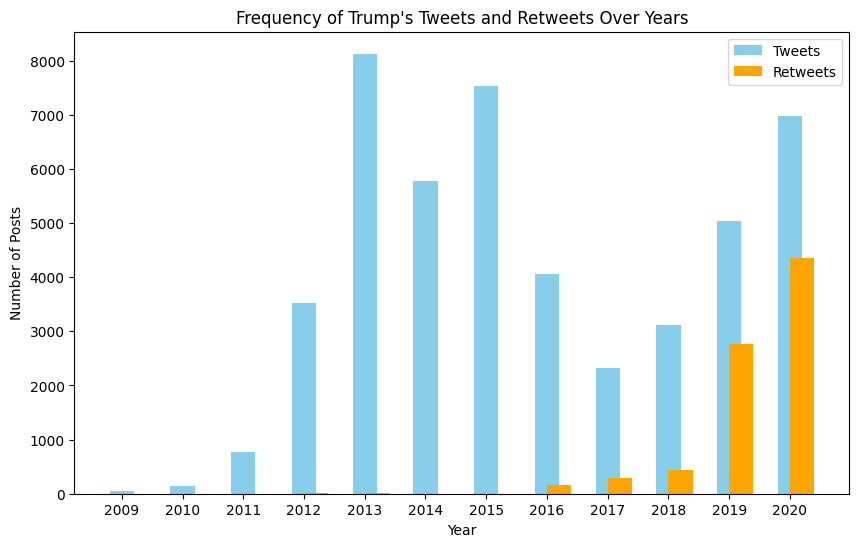

In [ ]:
years_rdd = valid_dates_rdd.map(extract_year)
rt_years_rdd = rt_valid_dates_rdd.map(extract_year)

# Creating key-value pairs (year, 1)
year_pairs_rdd = years_rdd.map(lambda year: (year, 1))
rt_year_pairs_rdd = rt_years_rdd.map(lambda year: (year, 1))

# Reducing by key to count occurrences of each year
year_counts_rdd = year_pairs_rdd.reduceByKey(lambda a, b: a + b)
rt_year_counts_rdd = rt_year_pairs_rdd.reduceByKey(lambda a, b: a + b)

# Collecting and sorting the results
year_counts = year_counts_rdd.collect()
year_counts.sort(key=lambda x: x[0])  # Sort by year

rt_year_counts = rt_year_counts_rdd.collect()
rt_year_counts.sort(key=lambda x: x[0])

# Separating the years and counts for plotting
years, tweet_counts = zip(*year_counts)
rt_years, retweet_counts = zip(*rt_year_counts)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(years, tweet_counts, color='skyblue', width=0.4, label='Tweets')
plt.bar(rt_years, retweet_counts, color='orange', width=0.4, label='Retweets', align='edge')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.title("Frequency of Trump's Tweets and Retweets Over Years")
plt.xticks(sorted(set(years + rt_years)))  # Combine and sort years from both sets
plt.legend()
plt.show()

In [ ]:
def extract_year_day(date):
    date_obj = datetime.strptime(date, '%d/%m/%Y')
    return (date_obj.year, date_obj.strftime('%j'))  # Year and day-of-year

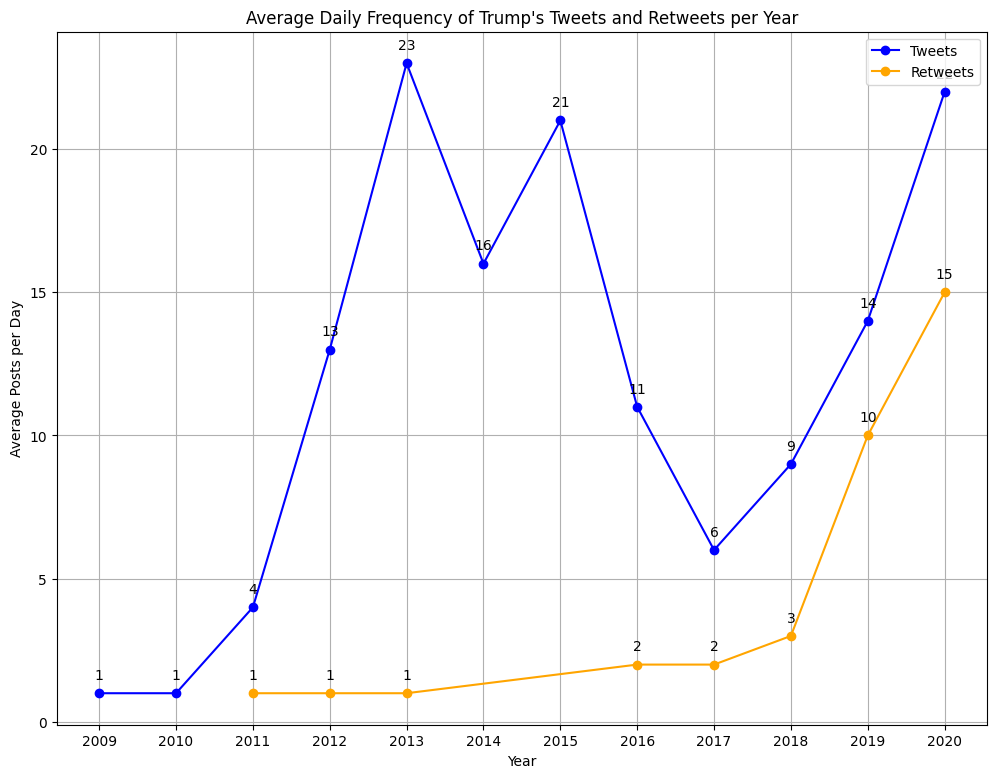

In [ ]:
# Apply the function to tweets and retweets
year_day_rdd = valid_dates_rdd.map(extract_year_day)
rt_year_day_rdd = rt_valid_dates_rdd.map(extract_year_day)

# Create key-value pairs and reduce by key
year_day_counts_rdd = year_day_rdd.map(lambda year_day: (year_day, 1)).reduceByKey(lambda a, b: a + b)
rt_year_day_counts_rdd = rt_year_day_rdd.map(lambda year_day: (year_day, 1)).reduceByKey(lambda a, b: a + b)

# Collect the results
year_day_counts = year_day_counts_rdd.collect()
rt_year_day_counts = rt_year_day_counts_rdd.collect()

# Calculate average daily counts for tweets
daily_counts_per_year = defaultdict(list)
for (year, day), count in year_day_counts:
    daily_counts_per_year[year].append(count)
average_daily_counts = {year: round(sum(counts)/len(counts)) for year, counts in daily_counts_per_year.items()}

# Calculate average daily counts for retweets
rt_daily_counts_per_year = defaultdict(list)
for (year, day), count in rt_year_day_counts:
    rt_daily_counts_per_year[year].append(count)
rt_average_daily_counts = {year: round(sum(counts)/len(counts)) for year, counts in rt_daily_counts_per_year.items()}

# Preparing data for plotting
years, avg_daily_counts = zip(*sorted(average_daily_counts.items()))
rt_years, rt_avg_daily_counts = zip(*sorted(rt_average_daily_counts.items()))

# Plotting
plt.figure(figsize=(12, 9))
plt.plot(years, avg_daily_counts, marker='o', color='blue', label='Tweets')
plt.plot(rt_years, rt_avg_daily_counts, marker='o', color='orange', label='Retweets')

# Adding labels
for i, txt in enumerate(avg_daily_counts):
    plt.annotate(f"{txt}", (years[i], avg_daily_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(rt_avg_daily_counts):
    plt.annotate(f"{txt}", (rt_years[i], rt_avg_daily_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Year')
plt.ylabel('Average Posts per Day')
plt.title("Average Daily Frequency of Trump's Tweets and Retweets per Year")
plt.xticks(sorted(set(years + rt_years)))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Function to extract the month from the date
def extract_month(date):
    month_tweet = datetime.strptime(date, '%d/%m/%Y')
    return month_tweet.month

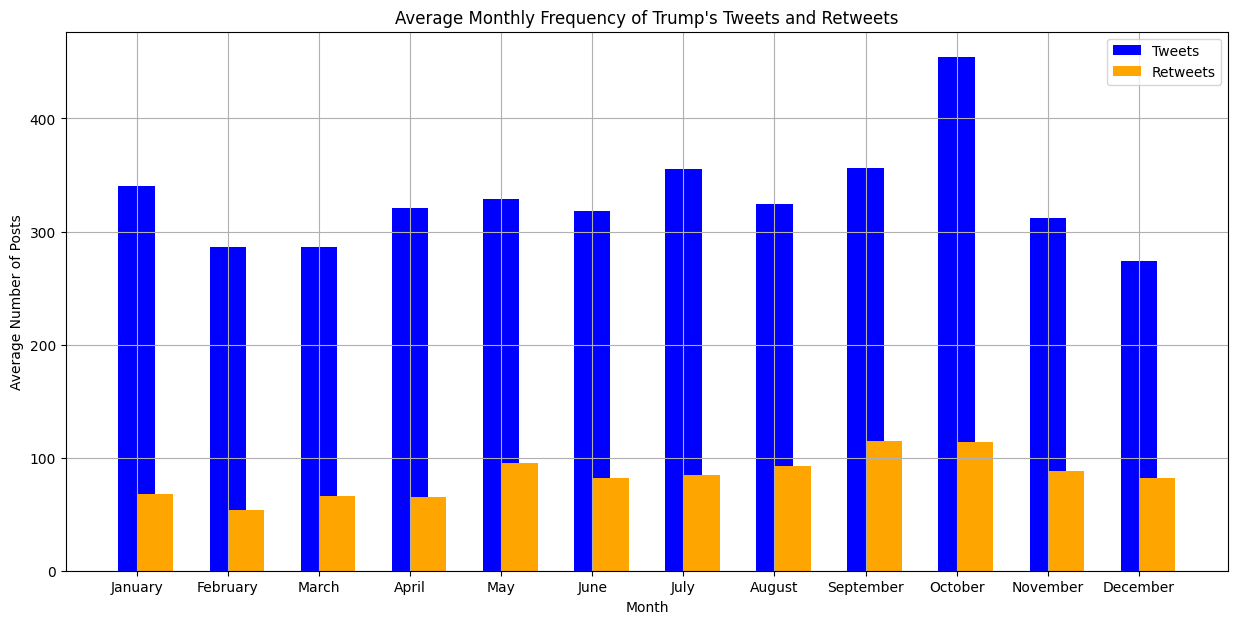

In [ ]:
# Map the valid dates to months
months_rdd = valid_dates_rdd.map(extract_month)
rt_months_rdd = rt_valid_dates_rdd.map(extract_month)

# Create a key-value pair RDD (month, 1)
month_pairs_rdd = months_rdd.map(lambda month: (month, 1))
rt_month_pairs_rdd = rt_months_rdd.map(lambda month: (month, 1))

# Reduce by key to count occurrences of each month
month_counts_rdd = month_pairs_rdd.reduceByKey(lambda a, b: a + b)
rt_month_counts_rdd = rt_month_pairs_rdd.reduceByKey(lambda a, b: a + b)

# Collect the results
month_counts = month_pairs_rdd.reduceByKey(lambda a, b: a + b).collect()
month_counts.sort(key=lambda x: x[0])  # Sort by month

rt_month_counts = rt_month_pairs_rdd.reduceByKey(lambda a, b: a + b).collect()
rt_month_counts.sort(key=lambda x: x[0])

# Calculate average monthly counts for tweets
month_sums = defaultdict(int)
unique_years = len(set(valid_dates_rdd.map(lambda date: datetime.strptime(date, '%d/%m/%Y').year).collect()))
for month, count in month_counts:
    month_sums[month] += count
average_month_counts = {month: round(total_count / unique_years) for month, total_count in month_sums.items()}

# Calculate average monthly counts for retweets
rt_month_sums = defaultdict(int)
rt_unique_years = len(set(rt_valid_dates_rdd.map(lambda date: datetime.strptime(date, '%d/%m/%Y').year).collect()))
for month, count in rt_month_counts:
    rt_month_sums[month] += count
rt_average_month_counts = {month: round(total_count / rt_unique_years) for month, total_count in rt_month_sums.items()}

# Preparing data for plotting
months, avg_counts = zip(*sorted(average_month_counts.items()))
rt_months, rt_avg_counts = zip(*sorted(rt_average_month_counts.items()))

# Plotting
plt.figure(figsize=(15, 7))
plt.bar(months, avg_counts, color='blue', width=0.4, label='Tweets')
plt.bar(rt_months, rt_avg_counts, color='orange', width=0.4, label='Retweets', align='edge')
plt.xlabel('Month')
plt.ylabel('Average Number of Posts')
plt.title("Average Monthly Frequency of Trump's Tweets and Retweets")
plt.xticks(range(1, 13), [datetime(2009, month, 1).strftime('%B') for month in range(1, 13)])  # Month names
plt.legend()
plt.grid(True)
plt.show()

---
##2. How much polarized are Donald Trump's tweets and retweets (Sentiment analysis) ?

###  <font color="green"> Step 1: Extracting tweets and retweets words and pre processing it </font>



In [ ]:
# compute an RDD with individual words from the split_original_tweets
rdd_tweets_words = original_tweets.flatMap(split_with_multiple_separator).filter(lambda word: word!="")
rdd_tweets_words.take(10)

['republicans',
 'and',
 'democrats',
 'have',
 'both',
 'created',
 'our',
 'economic',
 'problems',
 '02/08/2011']

In [ ]:
# compute an RDD with individual words from the split_retweets
rt_rdd_tweets_words = retweets.flatMap(split_with_multiple_separator).filter(lambda word: word!="")
rt_rdd_tweets_words.take(10)

['rt',
 '@cbs_herridge:',
 'read:',
 'letter',
 'to',
 'surveillance',
 'court',
 'obtained',
 'by',
 'cbs']

In [ ]:
# Map each word to a key-value pair (word, 1)
rdd_tweets_words_kv = rdd_tweets_words.map(lambda word: (word, 1))
rdd_tweets_words_kv.take(10)

[('republicans', 1),
 ('and', 1),
 ('democrats', 1),
 ('have', 1),
 ('both', 1),
 ('created', 1),
 ('our', 1),
 ('economic', 1),
 ('problems', 1),
 ('02/08/2011', 1)]

In [ ]:
# Map each word to a key-value pair (word, 1)
rt_rdd_tweets_words_kv = rt_rdd_tweets_words.map(lambda word: (word, 1))
rt_rdd_tweets_words_kv.take(10)

[('rt', 1),
 ('@cbs_herridge:', 1),
 ('read:', 1),
 ('letter', 1),
 ('to', 1),
 ('surveillance', 1),
 ('court', 1),
 ('obtained', 1),
 ('by', 1),
 ('cbs', 1)]

In [ ]:
# Convert the positive and negative words RDD to a list and then to lowercase for comparison
positive_words_list = set(word.lower() for word in positive_words.collect())
negative_words_list = set(word.lower() for word in negative_words.collect())
stop_words_list = set(word.lower() for word in stop_words.collect())

In [ ]:
# Filter the key-value RDD to include only pairs where the key is a positive word for tweets
positive_words_kv = rdd_tweets_words_kv.filter(lambda pair: pair[0] in positive_words_list)
positive_words_kv.take(5)

[('thrilled', 1), ('great', 1), ('love', 1), ('cherish', 1), ('respect', 1)]

In [ ]:
# Filter the key-value RDD to include only pairs where the key is a positive word for retweets
rt_positive_words_kv = rt_rdd_tweets_words_kv.filter(lambda pair: pair[0] in positive_words_list)
rt_positive_words_kv.take(5)

[('friendly', 1), ('compliant', 1), ('protect', 1), ('right', 1), ('boom', 1)]

In [ ]:
# Filter the RDD to include only key-value pairs where the key is a positive word for tweets
negative_words_kv = rdd_tweets_words_kv.filter(lambda pair: pair[0] in negative_words_list)
negative_words_kv.take(5)

[('problems', 1), ('scam', 1), ('threat', 1), ('disaster', 1), ('fraud', 1)]

In [ ]:
# Filter the RDD to include only key-value pairs where the key is a positive word for retweets
rt_negative_words_kv = rt_rdd_tweets_words_kv.filter(lambda pair: pair[0] in negative_words_list)
rt_negative_words_kv.take(5)

[('leaking', 1), ('scandal', 1), ('dishonest', 1), ('hard', 1), ('lying', 1)]

In [ ]:
# Deleting the stopwords from tweets
rdd_tweets_words_bis = rdd_tweets_words.subtract(stop_words)
rdd_tweets_words_bis.take(10)

['democrats',
 'democrats',
 'democrats',
 'democrats',
 'democrats',
 'democrats',
 'democrats',
 'democrats',
 'democrats',
 'democrats']

In [ ]:
# Deleting the stopwords from retweets
rt_rdd_tweets_words_bis = rt_rdd_tweets_words.subtract(stop_words)
rt_rdd_tweets_words_bis.take(10)

['@cbs_herridge:',
 '@cbs_herridge:',
 '@cbs_herridge:',
 '@cbs_herridge:',
 'letter',
 'letter',
 'letter',
 'letter',
 'letter',
 'letter']

In [ ]:
# Extract contextual words from tweets
contextual_words = rdd_tweets_words_bis.subtract(positive_words).subtract(negative_words)
contextual_words.take(5)

['co/z5crqho8vg', 'bahrain', 'bahrain', 'bahrain', 'bahrain']

In [ ]:
# Extract contextual words from retweets
rt_contextual_words = rt_rdd_tweets_words_bis.subtract(positive_words).subtract(negative_words)
rt_contextual_words.take(5)

['action', 'action', 'action', 'action', 'action']

###  <font color="green"> Step 2: Extracting positives words from Donald Trump's tweets and retweets

In [ ]:
# Reduce by key to sum up the counts for each positive word from tweets
positive_word_counts = positive_words_kv.reduceByKey(lambda a, b: a + b)
positive_word_counts.take(10)

[('thrilled', 46),
 ('love', 1083),
 ('wonderful', 464),
 ('sustainable', 3),
 ('win', 1022),
 ('peace', 99),
 ('support', 523),
 ('ready', 275),
 ('best', 1152),
 ('like', 1827)]

In [ ]:
# Reduce by key to sum up the counts for each positive word from retweets
rt_positive_word_counts = rt_positive_words_kv.reduceByKey(lambda a, b: a + b)
rt_positive_word_counts.take(10)

[('friendly', 5),
 ('right', 122),
 ('handily', 2),
 ('love', 77),
 ('incredible', 68),
 ('win', 86),
 ('good', 102),
 ('like', 177),
 ('worked', 13),
 ('savings', 2)]

In [ ]:
# Sort the rdd into descending order based on the count
positive_words_count_ordered = positive_word_counts.sortBy(lambda x:x[1], ascending=False)

# top 10 of positive word used in Trump's tweets
positive_words_count_ordered.take(10)

[('great', 7122),
 ('trump', 5151),
 ('thank', 3279),
 ('like', 1827),
 ('good', 1712),
 ('best', 1152),
 ('love', 1083),
 ('win', 1022),
 ('work', 904),
 ('better', 798)]

In [ ]:
# Sort the rdd into descending order based on the count
rt_positive_words_count_ordered = rt_positive_word_counts.sortBy(lambda x:x[1], ascending=False)

# top 10 of positive word used in Trump's retweets
rt_positive_words_count_ordered.take(10)

[('trump', 961),
 ('great', 346),
 ('thank', 246),
 ('like', 177),
 ('support', 147),
 ('right', 122),
 ('work', 103),
 ('good', 102),
 ('win', 86),
 ('strong', 80)]

In [ ]:
list_top_positive_opinion = positive_words_count_ordered.take(10)
list_top_positive_opinion

[('great', 7122),
 ('trump', 5151),
 ('thank', 3279),
 ('like', 1827),
 ('good', 1712),
 ('best', 1152),
 ('love', 1083),
 ('win', 1022),
 ('work', 904),
 ('better', 798)]

In [ ]:
rt_list_top_positive_opinion = rt_positive_words_count_ordered.take(10)
rt_list_top_positive_opinion

[('trump', 961),
 ('great', 346),
 ('thank', 246),
 ('like', 177),
 ('support', 147),
 ('right', 122),
 ('work', 103),
 ('good', 102),
 ('win', 86),
 ('strong', 80)]

###  <font color="green"> Step 3: Extracting negatives words from Donald Trump's tweets and retweets

In [ ]:
# Reduce by key to sum up the counts for each positive word
negative_word_counts = negative_words_kv.reduceByKey(lambda a, b: a + b)
negative_word_counts.take(10)

[('threat', 64),
 ('disaster', 292),
 ('fraud', 153),
 ('worse', 219),
 ('hate', 175),
 ('terrible', 366),
 ('dishonest', 198),
 ('fake', 1139),
 ('risk', 53),
 ('fear', 41)]

In [ ]:
# Reduce by key to sum up the counts for each positive word for retweets
rt_negative_word_counts = negative_words_kv.reduceByKey(lambda a, b: a + b)
rt_negative_word_counts.take(10)

[('threat', 64),
 ('disaster', 292),
 ('fraud', 153),
 ('worse', 219),
 ('hate', 175),
 ('terrible', 366),
 ('dishonest', 198),
 ('fake', 1139),
 ('risk', 53),
 ('fear', 41)]

In [ ]:
# Sort the rdd into descending order based on the count
negative_words_count_ordered = negative_word_counts.sortBy(lambda x:x[1], ascending=False)

# top 10 of negative word used in Trump's tweets
negative_words_count_ordered.take(10)

[('fake', 1139),
 ('bad', 961),
 ('hard', 696),
 ('crime', 505),
 ('crooked', 441),
 ('wrong', 396),
 ('illegal', 369),
 ('terrible', 366),
 ('lost', 330),
 ('radical', 324)]

In [ ]:
# Sort the rdd into descending order based on the count
rt_negative_words_count_ordered = rt_negative_word_counts.sortBy(lambda x:x[1], ascending=False)

# top 10 of negative word used in Trump's retweets
rt_negative_words_count_ordered.take(10)

[('fake', 1139),
 ('bad', 961),
 ('hard', 696),
 ('crime', 505),
 ('crooked', 441),
 ('wrong', 396),
 ('illegal', 369),
 ('terrible', 366),
 ('lost', 330),
 ('radical', 324)]

In [ ]:
list_top_negatives_opinion = negative_words_count_ordered.take(10)
list_top_negatives_opinion

[('fake', 1139),
 ('bad', 961),
 ('hard', 696),
 ('crime', 505),
 ('crooked', 441),
 ('wrong', 396),
 ('illegal', 369),
 ('terrible', 366),
 ('lost', 330),
 ('radical', 324)]

In [ ]:
rt_list_top_negatives_opinion = rt_negative_words_count_ordered.take(10)
rt_list_top_negatives_opinion

[('fake', 1139),
 ('bad', 961),
 ('hard', 696),
 ('crime', 505),
 ('crooked', 441),
 ('wrong', 396),
 ('illegal', 369),
 ('terrible', 366),
 ('lost', 330),
 ('radical', 324)]

###  <font color="green"> Step 4: Extracting contextual words from Donald Trump's tweets and retweets

In [ ]:
# Count each contextual word, excluding single letters, and sort them in descending order
contextual_words_ordered = contextual_words.filter(lambda word: len(word) > 1)\
                                           .map(lambda word: (word, 1))\
                                           .reduceByKey(lambda a, b: a + b)\
                                           .sortBy(lambda x: x[1], ascending=False)

contextual_words_ordered.take(10)

[('@realdonaldtrump', 8363),
 ('amp', 5015),
 ('president', 3061),
 ('people', 2999),
 ('just', 2942),
 ('thanks', 2116),
 ('new', 2111),
 ('country', 2086),
 ('america', 1974),
 ('big', 1926)]

In [ ]:
# Take the top 50 words
list_top_contextual_words = contextual_words_ordered.take(50)

In [ ]:
# Same for retweets
rt_contextual_words_ordered = rt_contextual_words.filter(lambda word: word.lower() != 'rt' and len(word) > 1)\
                                                 .map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda a, b: a + b)\
                                                 .sortBy(lambda x: x[1], ascending=False)

rt_contextual_words_ordered.take(10)

[('president', 1377),
 ('@realdonaldtrump', 1366),
 ('@realdonaldtrump:', 1025),
 ('@whitehouse:', 605),
 ('amp', 567),
 ('democrats', 480),
 ('biden', 393),
 ('american', 372),
 ('people', 370),
 ('today', 360)]

In [ ]:
# Take the top 50 words
rt_list_top_contextual_words = rt_contextual_words_ordered.take(50)

###  <font color="green"> Step 5: Visualizing polarized opinions from Donald Trump's tweets and retweets

<ipython-input-94-e31f3e940cc7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')


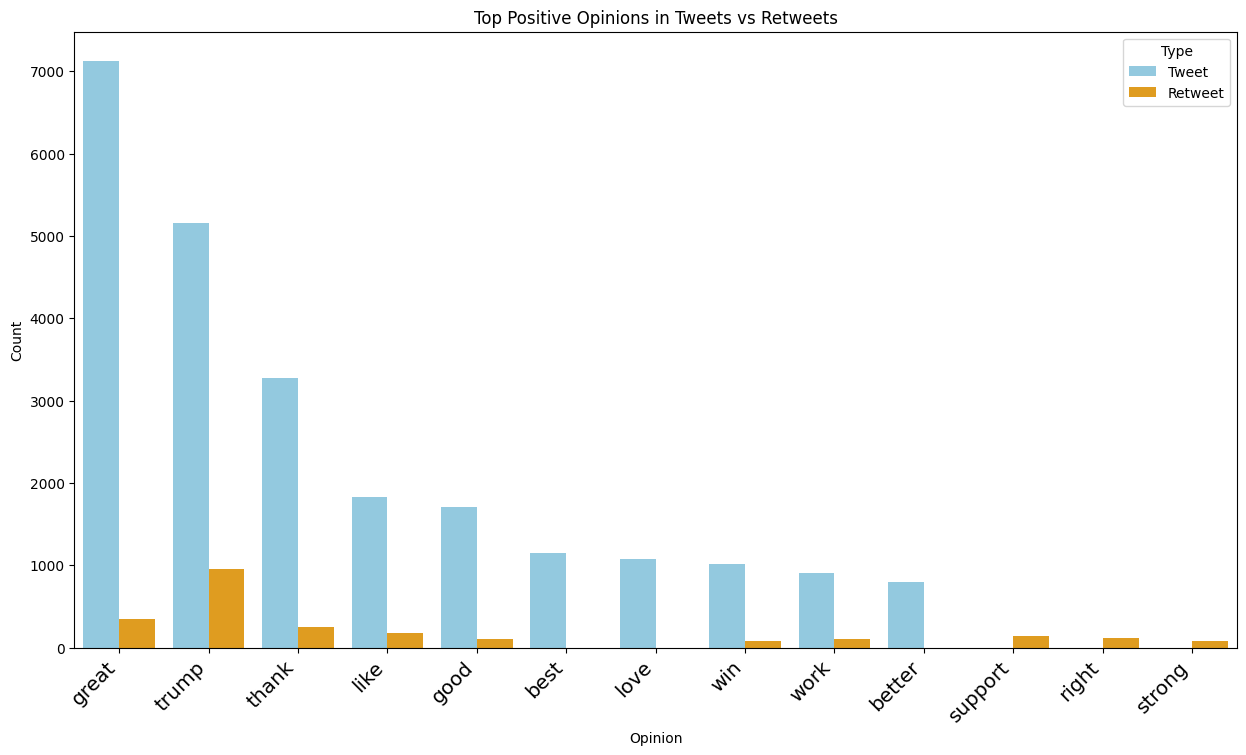

In [ ]:
def plot_opinions(tweet_list, retweet_list, title):
    # Prepare data for plotting
    tweet_df = pd.DataFrame(tweet_list, columns=['Opinion', 'Count'])
    tweet_df['Type'] = 'Tweet'

    retweet_df = pd.DataFrame(retweet_list, columns=['Opinion', 'Count'])
    retweet_df['Type'] = 'Retweet'

    combined_df = pd.concat([tweet_df, retweet_df])

    # Plotting
    plt.figure(figsize=(15, 8))
    chart = sb.barplot(data=combined_df, x='Opinion', y='Count', hue='Type', palette=["skyblue", "orange"])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

    plt.title(title)
    plt.xlabel('Opinion')
    plt.ylabel('Count')
    plt.show()

# Plotting positive opinions
plot_opinions(list_top_positive_opinion, rt_list_top_positive_opinion, 'Top Positive Opinions in Tweets vs Retweets')

<ipython-input-94-e31f3e940cc7>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')


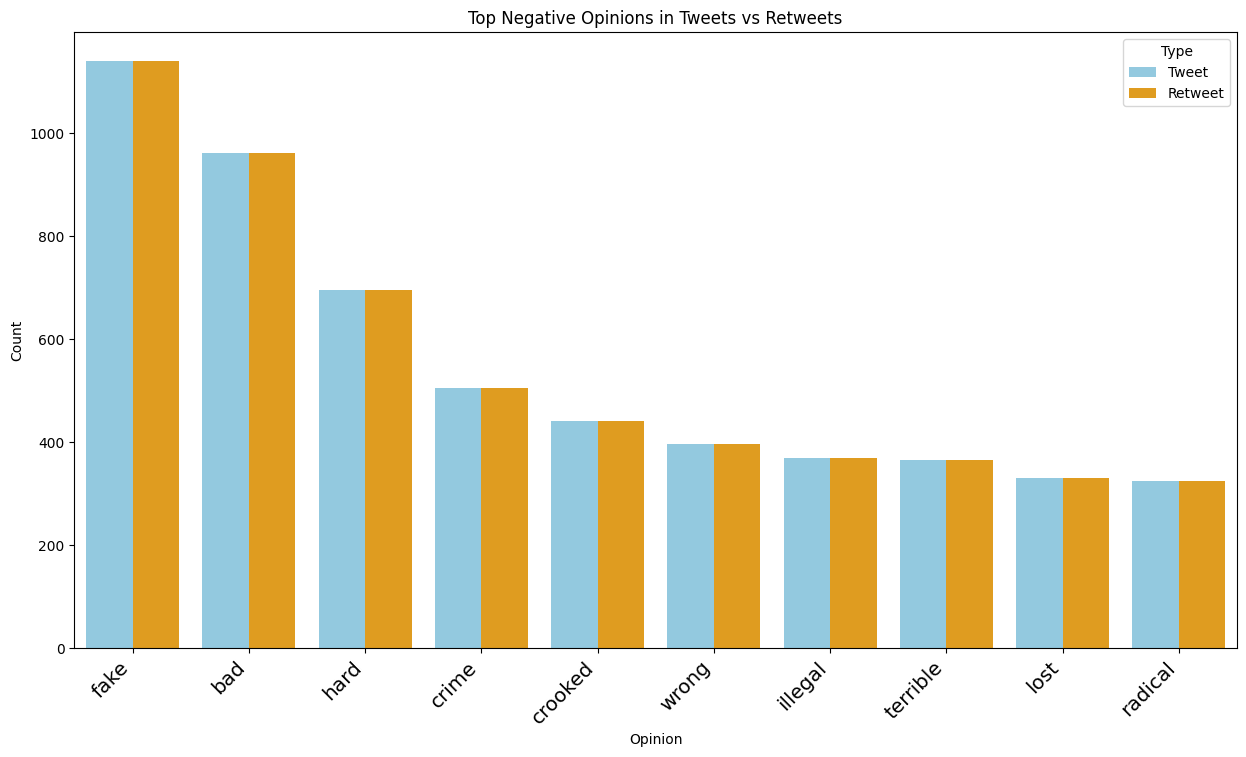

In [ ]:
# Plotting negative opinions
plot_opinions(list_top_negatives_opinion, rt_list_top_negatives_opinion, 'Top Negative Opinions in Tweets vs Retweets')

<ipython-input-107-97db58a5e4e7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(


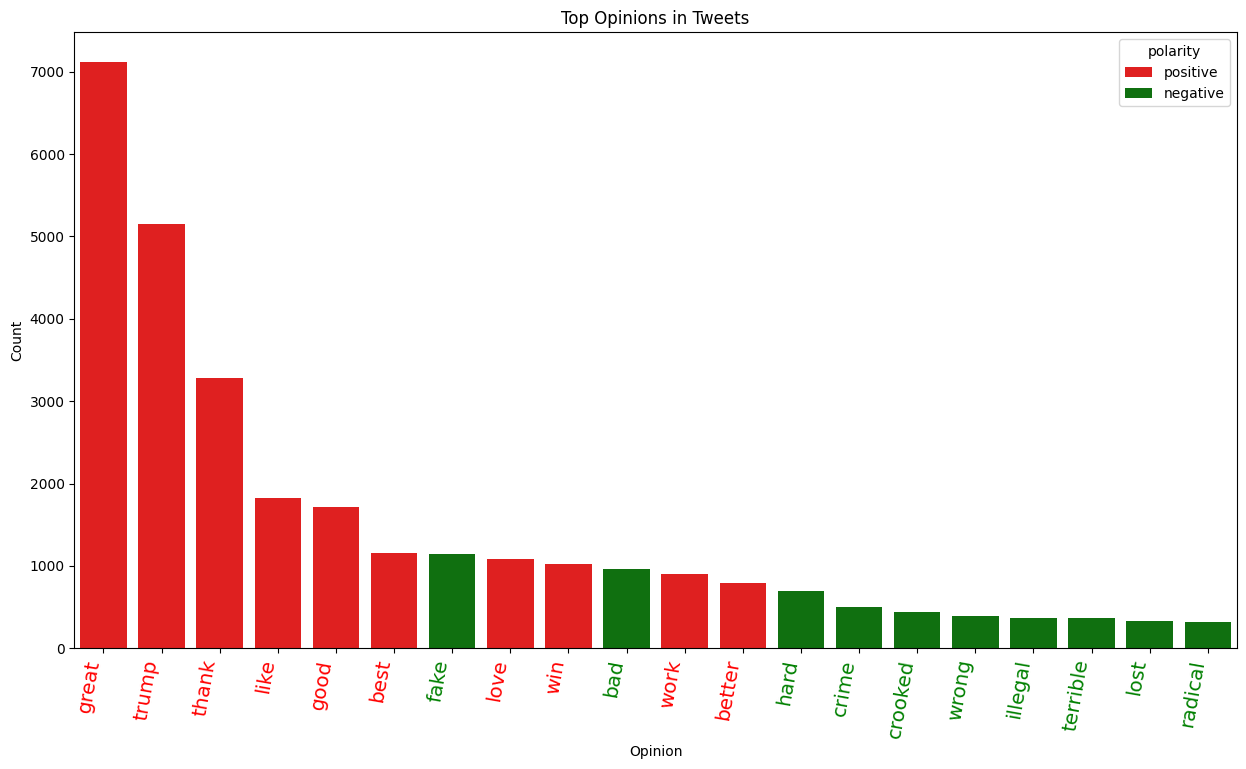

In [ ]:
# function to plot a bar chart presenting top positives and top negatives words

def plot_opinion(list_positives, list_negatives, title):

    list_1 = [(t[0], t[1], 'positive') for t in list_positives]
    list_2 = [(t[0], t[1], 'negative') for t in list_negatives]

    list_1.extend(list_2)

    pd_df = pd.DataFrame({
     'Opinion': [ t[0] for t in list_1 ],
     'Count': [ t[1] for t in list_1 ],
     'polarity': [ t[2] for t in list_1 ]
    }).sort_values('Count', ascending=False)

    pd_df['color'] = pd_df.polarity.apply(lambda polarity: 'red' if polarity=='positive' else 'green')

    plt.figure( figsize = (15, 8) )
    chart=sb.barplot(data=pd_df, x='Opinion', y='Count', hue='polarity', palette=["red", "green"], order=pd_df['Opinion'])
    chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=80,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )

    for tick, color in zip(chart.get_xticklabels(), pd_df['color']):
        tick.set_color(color)

    plt.title(title)

    plt.show()

# call the plot_opinion function to plot tweets top positives and negatives opinions
plot_opinion(list_top_positive_opinion, list_top_negatives_opinion, 'Top Opinions in Tweets')

<ipython-input-107-97db58a5e4e7>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(


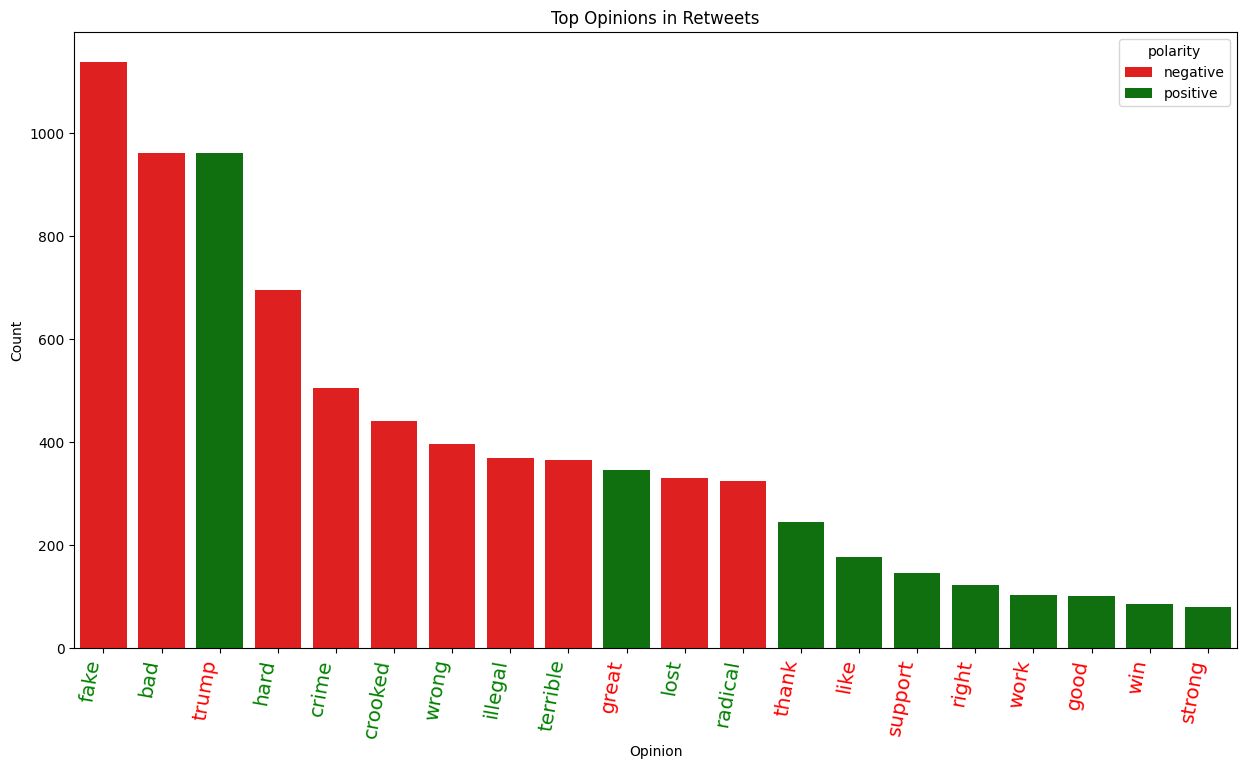

In [ ]:
# call the plot_opinion function to plot retweets top positives and negatives opinions
plot_opinion(rt_list_top_positive_opinion, rt_list_top_negatives_opinion, 'Top Opinions in Retweets')

In [ ]:
# function to plot_contextual_words plots a bar chart presenting top contextual words
def plot_contextual_words(list_contextual_words):

    pd_df = pd.DataFrame({
        'Word':  [ t[0] for t in list_contextual_words ],
        'Count': [ t[1] for t in list_contextual_words ]
    }).sort_values('Count', ascending=False)

    plt.figure( figsize = (15, 8) )

    chart=sb.barplot(data=pd_df, x='Word', y='Count', order=pd_df['Word'], color='blue')

    chart.set_xticklabels(
        chart.get_xticklabels(),
        rotation=80,
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large',
        )

    plt.show()

<ipython-input-109-6835d1f2c2c6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(


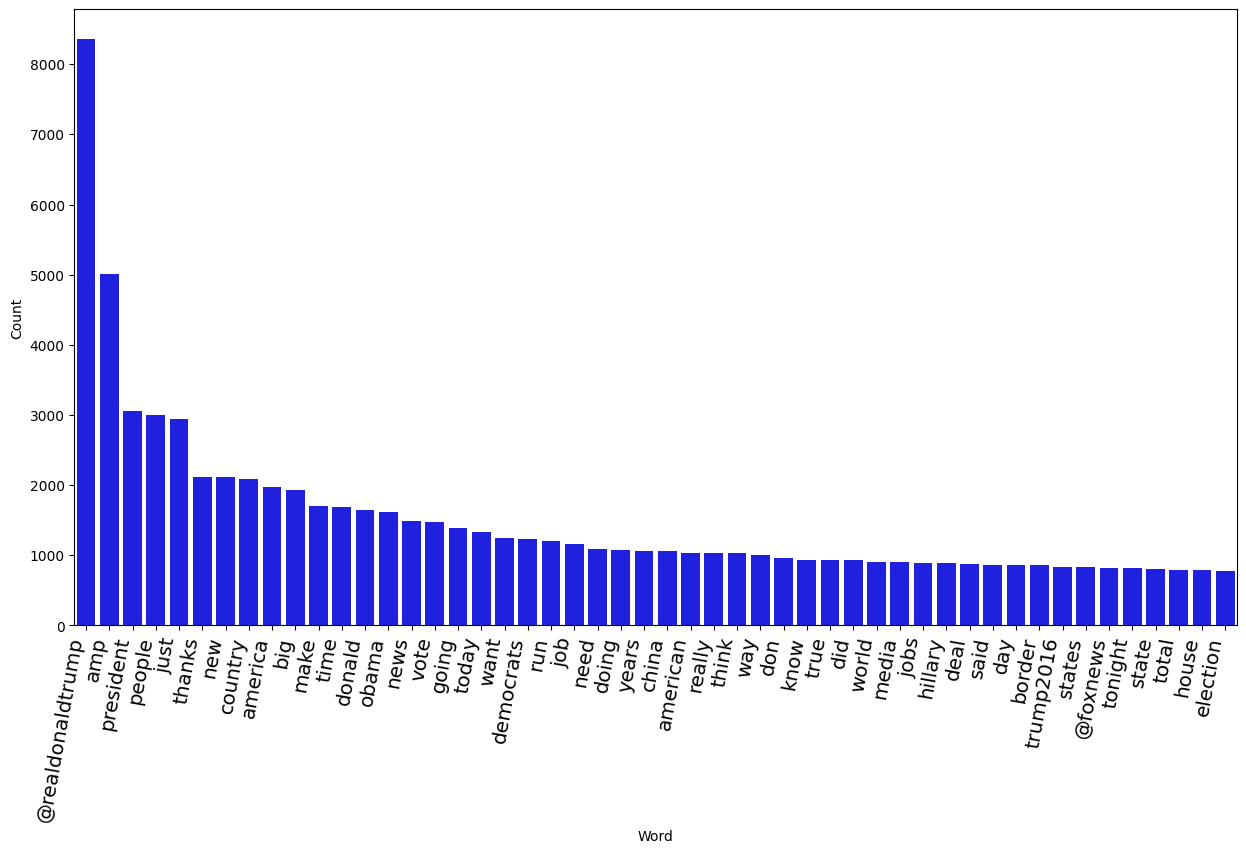

In [ ]:
# call the plot_contextual_words function to plot Trump's tweets top contextual words

plot_contextual_words(list_top_contextual_words)

<ipython-input-109-6835d1f2c2c6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(


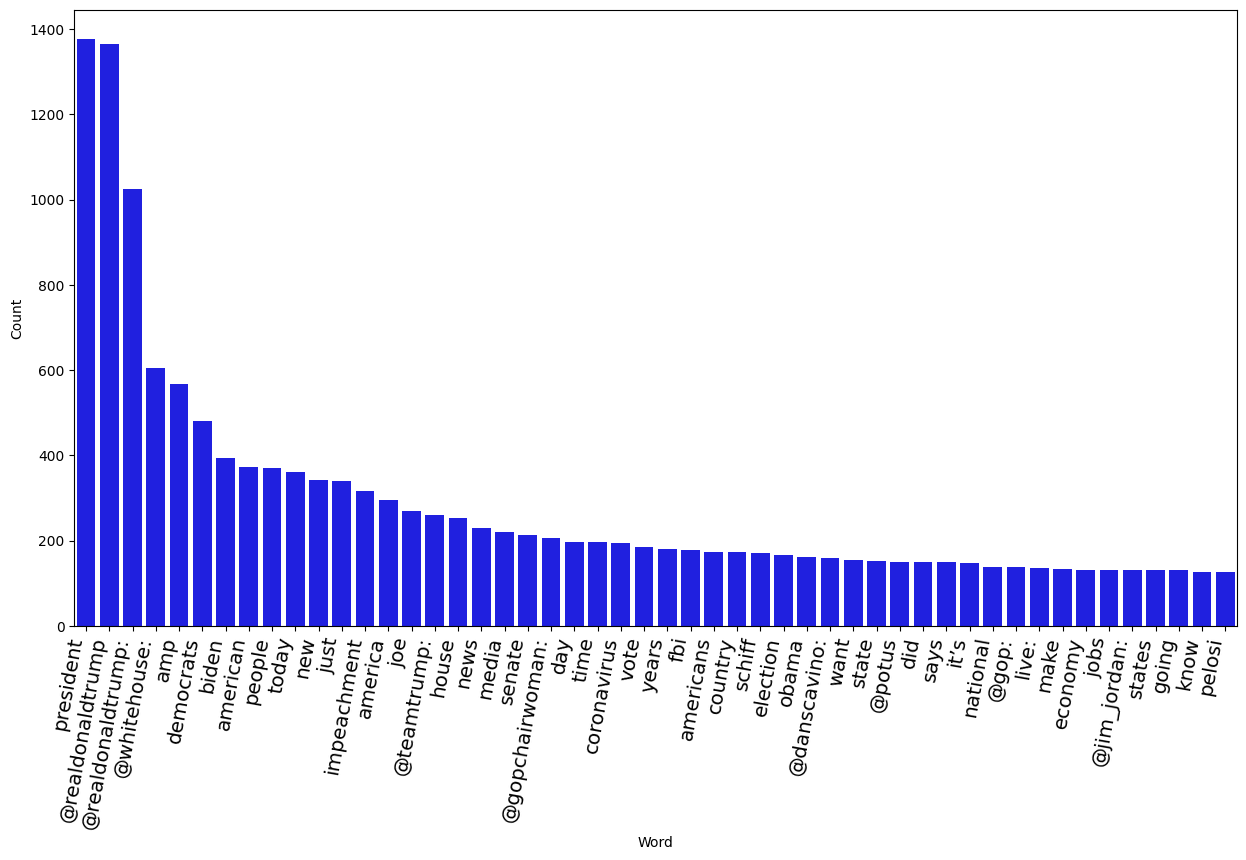

In [ ]:
# call the plot_contextual_words function to plot Trump's retweets top contextual words

plot_contextual_words(rt_list_top_contextual_words)

###  <font color="green"> Conclusion of the sentiment analysis </font>

In [ ]:
# Compute the global sentiment score: the total count of positive words minus
# the total count of negative words
sentiment_score = positive_word_counts.values().sum() - negative_word_counts.values().sum()
negative_score = round((negative_word_counts.values().sum() / (positive_word_counts.values().sum() + negative_word_counts.values().sum()))*100)
positive_score = round((positive_word_counts.values().sum() / (positive_word_counts.values().sum() + negative_word_counts.values().sum()))*100)

print('The sentiment score is : ',sentiment_score)
print("Negative sentiment represents :", negative_score, "% of Trump's tweets")
print("Positive sentiment represents :", positive_score, "% of Trump's tweets")

The sentiment score is :  24265
Negative sentiment represents : 36 % of Trump's tweets
Positive sentiment represents : 64 % of Trump's tweets


In [ ]:
# For retweets
# the total count of negative words
rt_sentiment_score = rt_positive_word_counts.values().sum() - rt_negative_word_counts.values().sum()
rt_negative_score = round((rt_negative_word_counts.values().sum() / (rt_positive_word_counts.values().sum() + rt_negative_word_counts.values().sum()))*100)
rt_positive_score = round((rt_positive_word_counts.values().sum() / (rt_positive_word_counts.values().sum() + rt_negative_word_counts.values().sum()))*100)

print('The sentiment score is : ',rt_sentiment_score)
print("Negative sentiment represents :", rt_negative_score, "% of Trump's retweets")
print("Positive sentiment represents :", rt_positive_score, "% of Trump's retweets")

The sentiment score is :  -24131
Negative sentiment represents : 83 % of Trump's retweets
Positive sentiment represents : 17 % of Trump's retweets


## 3. How often did Trump tweeted or retweeted about other political figures and about which ones ?

In [ ]:
def extract_mentions(tweet):
    # Split the tweet into words and filter those that start with "@"
    return [word.rstrip(':') for word in tweet.split() if word.startswith("@")]

rt_mentions_rdd = rt_rdd_tweets_words_bis.flatMap(extract_mentions)

# To see some of the extracted mentions
sample_mentions = rt_mentions_rdd.take(10)
print(sample_mentions)

['@cbs_herridge', '@cbs_herridge', '@cbs_herridge', '@cbs_herridge', '@erictrump', '@erictrump', '@erictrump', '@erictrump', '@erictrump', '@erictrump']


In [ ]:
# Reduce by key to sum up the counts for each positive word for retweets
rt_mentions_rdd_kv = rt_mentions_rdd.map(lambda word: (word, 1))\
                                    .reduceByKey(lambda a, b: a + b)\
                                     .sortBy(lambda x: x[1], ascending=False)
rt_mentions_rdd_kv.take(5)

[('@realdonaldtrump', 2391),
 ('@whitehouse', 646),
 ('@teamtrump', 272),
 ('@gopchairwoman', 210),
 ('@danscavino', 166)]

In [ ]:
# Take the top 10 mentions
rt_list_top_mentions = rt_mentions_rdd_kv.take(10)
rt_list_top_mentions

[('@realdonaldtrump', 2391),
 ('@whitehouse', 646),
 ('@teamtrump', 272),
 ('@gopchairwoman', 210),
 ('@danscavino', 166),
 ('@potus', 152),
 ('@jim_jordan', 149),
 ('@gop', 146),
 ('@donaldjtrumpjr', 134),
 ('@dbongino', 133)]

In [ ]:
mentions_rdd = rdd_tweets_words_bis.flatMap(extract_mentions)

# To see some of the extracted mentions
tweet_sample_mentions = mentions_rdd.take(10)
print(tweet_sample_mentions)

['@joebiden', '@joebiden', '@joebiden', '@joebiden', '@joebiden', '@joebiden', '@joebiden', '@joebiden', '@joebiden', '@joebiden']


In [ ]:
# Reduce by key to sum up the counts for each positive word for tweets
mentions_rdd_kv = mentions_rdd.map(lambda word: (word, 1))\
                              .reduceByKey(lambda a, b: a + b)\
                              .sortBy(lambda x: x[1], ascending=False)
mentions_rdd_kv.take(5)

[('@realdonaldtrump', 8474),
 ('@foxnews', 848),
 ('@barackobama', 684),
 ('@foxandfriends', 625),
 ('@apprenticenbc', 387)]

In [ ]:
# Take the top 10 mentions
list_top_mentions = mentions_rdd_kv.take(10)
list_top_mentions

[('@realdonaldtrump', 8474),
 ('@foxnews', 848),
 ('@barackobama', 684),
 ('@foxandfriends', 625),
 ('@apprenticenbc', 387),
 ('@cnn', 369),
 ('@mittromney', 301),
 ('@seanhannity', 228),
 ('@nytimes', 193),
 ('@whitehouse', 189)]

###  <font color="green"> Visualizing Donald Trump's mentions on tweets and retweets

<ipython-input-148-e992437d2900>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')


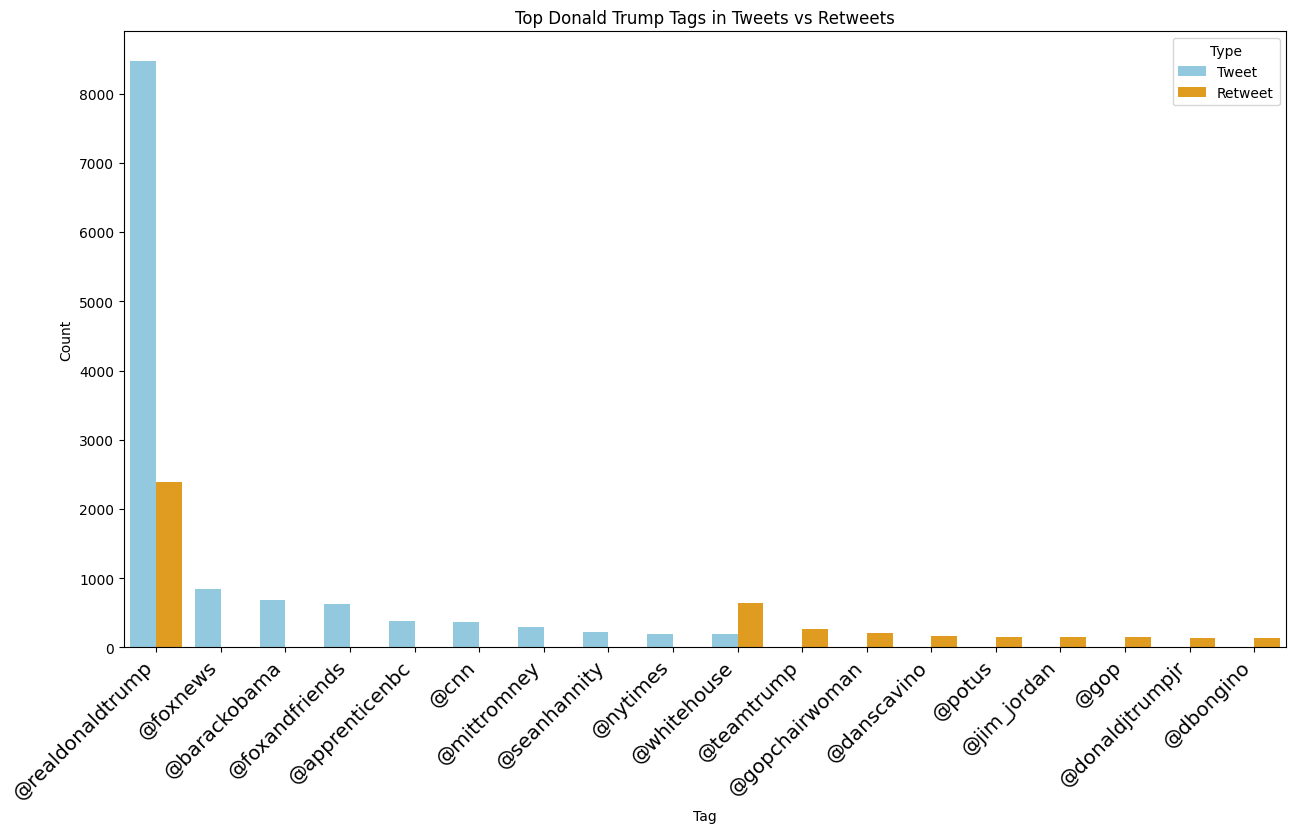

In [ ]:
def plot_opinions(tweet_mention, retweet_mention, title):
    # Prepare data for plotting
    tweet_df = pd.DataFrame(tweet_mention, columns=['Tag', 'Count'])
    tweet_df['Type'] = 'Tweet'

    retweet_df = pd.DataFrame(retweet_mention, columns=['Tag', 'Count'])
    retweet_df['Type'] = 'Retweet'

    combined_df = pd.concat([tweet_df, retweet_df])

    # Plotting
    plt.figure(figsize=(15, 8))
    chart = sb.barplot(data=combined_df, x='Tag', y='Count', hue='Type', palette=["skyblue", "orange"])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

    plt.title(title)
    plt.xlabel('Tag')
    plt.ylabel('Count')
    plt.show()

# Plotting positive opinions
plot_opinions(list_top_mentions, rt_list_top_mentions, 'Top Donald Trump Tags in Tweets vs Retweets')


<ipython-input-149-34e60695079a>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')


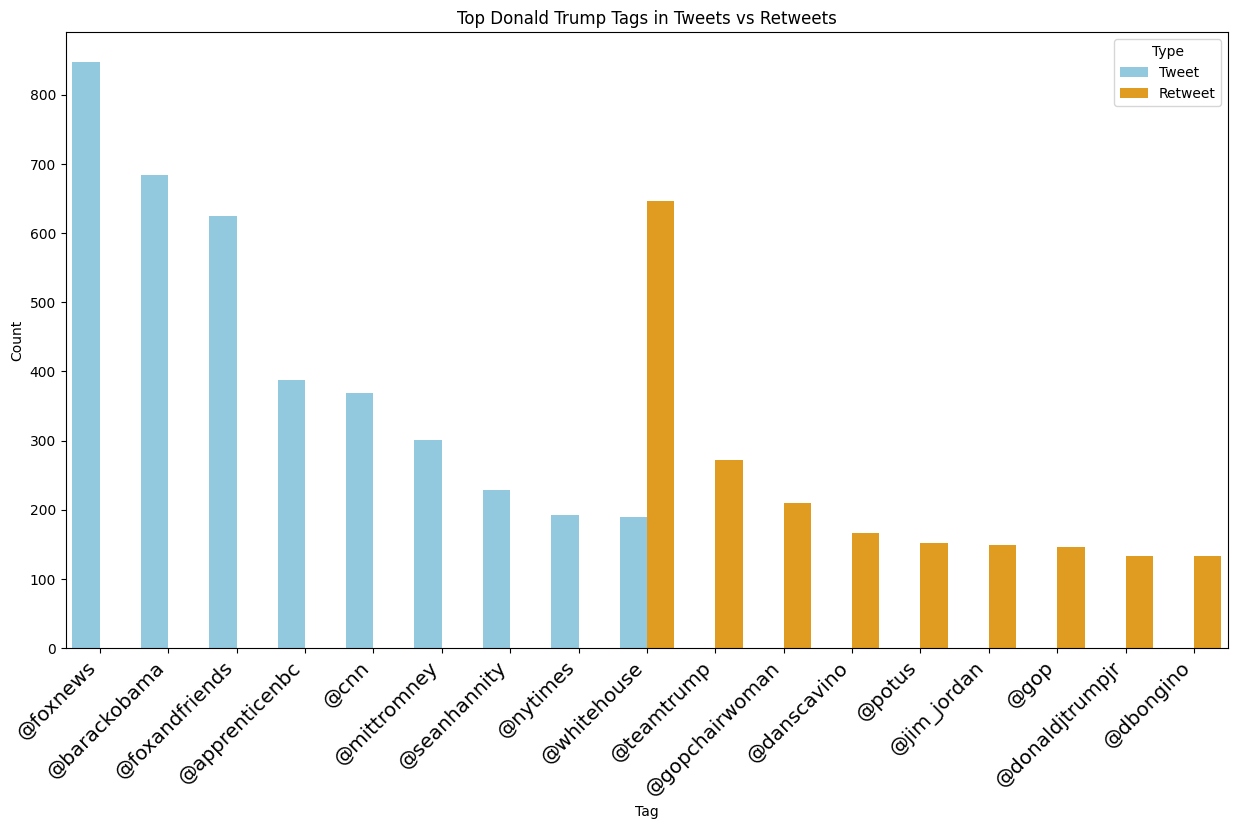

In [ ]:
def plot_opinions(tweet_mention, retweet_mention, title, exclude_tags=["@realdonaldtrump"]):
    # Convert exclude tags to lowercase for case-insensitive comparison
    exclude_tags = [tag.lower() for tag in exclude_tags]

    # Filter out the specified tags
    tweet_mention_filtered = [mention for mention in tweet_mention if mention[0].lower() not in exclude_tags]
    retweet_mention_filtered = [mention for mention in retweet_mention if mention[0].lower() not in exclude_tags]

    # Prepare data for plotting
    tweet_df = pd.DataFrame(tweet_mention_filtered, columns=['Tag', 'Count'])
    tweet_df['Type'] = 'Tweet'

    retweet_df = pd.DataFrame(retweet_mention_filtered, columns=['Tag', 'Count'])
    retweet_df['Type'] = 'Retweet'

    combined_df = pd.concat([tweet_df, retweet_df])

    # Plotting
    plt.figure(figsize=(15, 8))
    chart = sb.barplot(data=combined_df, x='Tag', y='Count', hue='Type', palette=["skyblue", "orange"])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

    plt.title(title)
    plt.xlabel('Tag')
    plt.ylabel('Count')
    plt.show()

# Plotting
plot_opinions(list_top_mentions, rt_list_top_mentions, 'Top Donald Trump Tags in Tweets vs Retweets')

---

###  <font color="green"> Other analyses pf Donald Trump's tweets and retweets about political figure

In [ ]:
# function to capture his references
def split_with_multiple_separator(string_value):
    # Splitting using multiple separators and on words starting with '@'
    split_string = re.split(r'\s*[\,\[\];.!\&\'"$]+|\s*@\w+\b\s*', string_value.strip())
    return split_string

# Example usage
example_string = "Tweet @username: splitting, on; multiple: separators; including @mentions."
print(split_with_multiple_separator(example_string))

In [ ]:
# List of political figures
political_figures = ["joe", "biden", "hillary", "clinton", "barack", "obama", "nancy", "pelosi", "mitch", "mcconnell", "mike", "pence", "bill", "clinton"]

# Function to group related political figures
def merge_related_figures(figure):
    figure = figure.lower()
    if figure in ["joe", "biden"]:
        return "joe biden"
    elif figure in ["hillary", "clinton"]:
        return "hillary clinton"
    elif figure in ["barack", "obama"]:
        return "barack obama"
    elif figure in ["nancy", "pelosi"]:
        return "nancy pelosi"
    elif figure in ["mitch", "mcconnell"]:
        return "mitch mcconnell"
    elif figure in ["mike", "pence"]:
        return "mike pence"
    elif figure in ["bill", "clinton"]:
        return "bill clinton"
    else:
        return figure

In [ ]:
# FlatMap each tweet to get individual words and filter political figures
political_mentions = original_tweets.flatMap(lambda tweet: tweet.lower().split()).filter(lambda word: word in political_figures)

# Map to merge related political figures
merged_political_mentions = political_mentions.map(lambda figure: (merge_related_figures(figure), 1))

# Count the occurrences of each merged political figure
merged_political_mentions_count = merged_political_mentions.reduceByKey(lambda a, b: a + b)

# Sort the merged political figures by count in descending order
sorted_merged_political_mentions = merged_political_mentions_count.sortBy(lambda x: x[1], ascending=False)

# Display the merged political figures mentioned by Trump and their frequency
print("Merged Political figures mentioned by Trump and their frequency:")
for figure, count in sorted_merged_political_mentions.collect():
    print(f"{figure}: {count} times")

In [ ]:
# Function to extract political figures from a tweet
def extract_figures(tweet):
    words = tweet.lower().split()
    return [merge_related_figures(word) for word in words if word in political_figures]

# FlatMap each tweet to extract individual political figures
political_mentions = original_tweets.flatMap(extract_figures)

# Map and count each mention
mention_counts = political_mentions.map(lambda figure: (figure, 1)).reduceByKey(lambda a, b: a + b)

# Collect and sort the results
sorted_mentions = mention_counts.sortBy(lambda x: x[1], ascending=False).collect()

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.barh(fig_names, fig_counts, color='skyblue')
plt.xlabel('Number of Mentions')
plt.ylabel('Political Figures')
plt.title('Frequency of Trump Tweeting About Political Figures')

# Invert y-axis to have the highest count at the top
plt.gca().invert_yaxis()

# Adding labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f' {int(bar.get_width())}',
             va='center', ha='left', color='blue', fontsize=10)

plt.show()

In [ ]:
# Function to count occurrences of search words in each tweet
def count_search_words(tweet):
    counts = {word: 0 for word in search_words_party}
    for word in tweet.lower().split():
        if word in counts:
            counts[word] += 1
    return counts

# Count occurrences of search words in the tweets
word_counts = trump_tweets.map(count_search_words).reduce(lambda a, b: {word: a.get(word, 0) + b.get(word, 0) for word in search_words_party})

# Separate counts for Republican and Democratic words
republican_count = sum(count for word, count in word_counts.items() if word in ["republican", "republicans", "conservative", "right", "right wing"])
democratic_count = sum(count for word, count in word_counts.items() if word in ["democrat", "democrats", "democratic", "left wing", "left"])

plt.figure(figsize=(8, 5))
republican_bar = plt.bar(['Republican'], [republican_count], color='skyblue', label='Republican')
democrat_bar = plt.bar(['Democrat(s)'], [democratic_count], color='salmon', label='Democrat(s)')
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.title('Occurrences of Search Words by Party')
plt.legend()

# Adding labels to each bar
for bar in republican_bar + democrat_bar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.show()

print("---------------------------------------------------------------------------------------")
print("Donald Trump is tweeting more about his opponents, which seems pretty logical.")
print("However, we see that he tweets as well about his team. These pieces of information deserve a deep dive!")
print("----------------------------------------------------------------------------------------")


---

#<font color="red">The end. </font>